### Setup

In [3]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEXMEGA'
CRYPTO_TARGET = 'AVRCRYPTOLIB'

In [30]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../../hardware/victims/firmware/simpleserial-rsa
#make clean PLATFORM=$1 CRYPTO_TARGET=$2
make PLATFORM=$1 CRYPTO_TARGET=$2

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: „.dep“ ist bereits aktuell.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 5.4.0
Copyright (C) 2015 Free Software Foundation, Inc.
Dies ist freie Software; die Kopierbedingungen stehen in den Quellen. Es
gibt KEINE Garantie; auch nicht für MARKTGÄNGIGKEIT oder FÜR SPEZIELLE ZWECKE.

.
Compiling:
-en     simpleserial-rsa.c ...
-e Done!
.
Compiling:
-en     simpleserial-rsa-xmega.c ...
-e Done!
.
Compiling:
-en     simpleserial-rsa-arm.c ...
-e Done!
.
Compiling:
-en     .././simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     .././hal/xmega/XMEGA_AES_driver.c ...
-e Done!
.
Compiling:
-en     .././hal/xmega/uart.c ...
-e Done!
.
Compiling:
-en     .././hal/xmega/usart_driver.c ...
-e Done!
.
Compiling:
-en     .././hal/xmega/xmega_hal.c ...
-e Done!
.
Compiling:
-en     .././crypto/avrcryptolib/

In [31]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍
scope.adc.samples                        changed from 1000                      to 5000                     
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                


In [32]:
fw_path = '../../../hardware/victims/firmware/simpleserial-rsa/simpleserial-rsa-CWLITEXMEGA.hex'

In [33]:
cw.program_target(scope, prog, fw_path)

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 15377 bytes


In [17]:
import numpy as np
import time 
import matplotlib.pylab as plt
import matplotlib

In [ ]:
e = 65537
n = 3849453107

In [26]:
n = 3231080904348211197507744225057151739674198701955287013863366120571536075433289354791858611634080222605797512592173476389538288555005341834233505795734023
e = 65537

### find numbers

In [ ]:
threshold = 65535
p = 62549
q = 61543


i = 0
while True:
    result = pow(i, e, n)
    if result < threshold:
        if (i % p) - (i % q) < 0:
            break
    i += 1


print(i)


In [ ]:
def find_i_values(p, q, count=10):
    i = 0  # Startwert
    results = []
    
    while len(results) < count:
        if (i % p) - (i % q) < 0:
            results.append(i)
        i += 1
    
    return results

# Parameter p und q
p = 62549
q = 61543

# Finde die ersten 10 Werte für i
i_values = find_i_values(p, q)
print(i_values)

In [ ]:
x = (12424 ** e ) % n
print (x)

In [1]:
from sympy import nextprime

# Start with a random 31-byte number and search for a 32-byte prime
start_number = int('F' * 62, 16)  # A large number close to the 32-byte maximum
prime_32_byte = nextprime(start_number)

print(prime_32_byte)

ModuleNotFoundError: No module named 'sympy'

In [ ]:

c = 5684259762139843655781356425852695126552655458951556452711545265845156545461
d = 452312848583266388373324160190187140051835877600158453279131187530910662737 
def is_prime(n):
    if n < 2:
        return False
    i = 2
    while i*i <= n:
        if n % i == 0:
            return False
        i += 1
    return True

#print(is_prime(11))  # True
#print(is_prime(1))   # False

#print(c, ' ist primezahl', is_prime(c)) 
print(d, ' ist primezahl', is_prime(d)) 

In [3]:
c = 56842597621398436557813564258526951265526554589515564527115452658451565454621

z = c.to_bytes(32,'big')

print(z)

d = 56842597621398436557813564258526951265526554589515564527115452658451565454963



b'}\xab\xc5\'.\xf4"o\x8c\x8c\x07q\xdcxI,\xa1[CLf\x08\xe0\xef\x9c\xa6\xee\x86\xcbo%\x1d'


In [2]:
# prime numbers with 32 bytes 

p = 56842597621398436557813564258526951265526554589515564527115452658451565454963
pb = p.to_bytes(32,'big')
print('p', p, pb, hex(p))
q = 56842597621398436557813564258526951265526554589515564527115452658451565454621
qb = q.to_bytes(32,'big')
print('q', q, qb, hex(q))

N = p*q
#print(N) # 3231080904348211197507744225057151739674198701955287013863366120571536075433289354791858611634080222605797512592173476389538288555005341834233505795734023
Nb = N.to_bytes(64,'big')
print('N', N, Nb, hex(N))

e = 65537
eb = e.to_bytes(32,'big')
print('e', e, eb, hex(e))

euler = (p-1)*(q-1)
#print(euler)
# 3231080904348211197507744225057151739674198701955287013863366120571536075433175669596615814760964595477280458689642423280359257425951110928916602664824440

#imversis zu e mod euler: e*d + k * euler = 1 = ggT(e, euler)
# www.ardt-brunner.de : 
# -1378424264227407981310084697016538832866181264140376727964445326534012498787496506496357501333625419609522626066248264529892495512033921455995533727601607
# * e +
# 27959
# * euler = 1 

d_ = -1378424264227407981310084697016538832866181264140376727964445326534012498787496506496357501333625419609522626066248264529892495512033921455995533727601607

d = d_ + euler
# print(d)
# 1852656640120803216197659528040612906808017437814910285898920794037523576645679163100258313427339175867757832623394158750466761913917189472921068937222833
db = d.to_bytes(64,'big')
print('d', d, db, hex(d))

#test
#t = (d * e ) % euler
# print(t)

dp = d % (p-1)
#print(dp)
#42226251814971434209944815538190405761053455455552821444414846768645413494283
dpb = dp.to_bytes(32,'big')
print('dp', dp, dpb, hex(dp))

dq = d % (q-1)
#print(dq)
#47798018101494521266834730193984493603489676013146974160013511154837836956813
dqb = dq.to_bytes(32,'big')
print('dq', dq, dqb, hex(dq))


qinv = pow(q, -1, p)
#print(qinv)
#21773041778956711079162505607798335133871282605925552494304457012447821855556
qinvb = qinv.to_bytes(32,'big')
print('qinv', qinv, qinvb, hex(qinv))

#test
#t2 =(qinv * q) % p
#print(t2)

p 56842597621398436557813564258526951265526554589515564527115452658451565454963 b'}\xab\xc5\'.\xf4"o\x8c\x8c\x07q\xdcxI,\xa1[CLf\x08\xe0\xef\x9c\xa6\xee\x86\xcbo&s' 0x7dabc5272ef4226f8c8c0771dc78492ca15b434c6608e0ef9ca6ee86cb6f2673
q 56842597621398436557813564258526951265526554589515564527115452658451565454621 b'}\xab\xc5\'.\xf4"o\x8c\x8c\x07q\xdcxI,\xa1[CLf\x08\xe0\xef\x9c\xa6\xee\x86\xcbo%\x1d' 0x7dabc5272ef4226f8c8c0771dc78492ca15b434c6608e0ef9ca6ee86cb6f251d
N 3231080904348211197507744225057151739674198701955287013863366120571536075433289354791858611634080222605797512592173476389538288555005341834233505795734023 b'=\xb11\xc9>\x08x\n\x04ES\xd59Q\x91\xb5!QS5{\xca\xe3\xda\xf6\xaaC\x1a\xac\xb7H\xad!b\xdbuo\x96r\x12\xc9rN\x93\xc6b\xac\xbb\xb7w\x8b\x0e\x95$\xbe\xdd\x03\xa4\xe3\x8c\xf9\x02\xfa\x07' 0x3db131c93e08780a044553d5395191b5215153357bcae3daf6aa431aacb748ad2162db756f967212c9724e93c662acbbb7778b0e9524bedd03a4e38cf902fa07
e 65537 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
# generate 8 byte numbers and get next prime number
import random
from sympy import nextprime

#unsigned_8_byte = random.randint(0, 2**64 - 1)
unsigned_8_byte = 6353019252147394183;
print(unsigned_8_byte)



#print(rand)
prime1 = nextprime(unsigned_8_byte)
print("p1:", prime1)
print(prime1.to_bytes(8,'big'))

r = 14091828191315287468

prime2 = nextprime(r)
print('p2:', prime2)
print(prime2.to_bytes(8,'big'))

# p2 = 14091828191315287577


In [4]:
# prime numbers with 8 bytes
#p1: 6353019252147394247
#p2: 14091828191315287507

#p>q


p = 14091828191315287507
pb = p.to_bytes(8,'big')
print('p', p, pb, hex(p))
q =6353019252147394247
qb = q.to_bytes(8,'big')
print('q', q, qb, hex(q))

N = p*q
#print(N) # 89525655797379415138998373505682772229
Nb = N.to_bytes(16,'big')
print('N', N, Nb, hex(N))

e = 65537
eb = e.to_bytes(32,'big')
print('e', e, eb, hex(e))

euler = (p-1)*(q-1)
print('euler', euler)
# 89525655797379415118553526062220090476


p 14091828191315287507 b'\xc3\x90;\x14\x0b.\xdd\xd3' 0xc3903b140b2eddd3
q 6353019252147394247 b'X*uY\x9fv\x96\xc7' 0x582a75599f7696c7
N 89525655797379415138998373505682772229 0x435a039df717d16071357bdd73aa1105
e 65537 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01' 0x10001
euler 89525655797379415118553526062220090476


In [6]:

#imversis zu e mod euler: e*d + k * euler = 1 = ggT(e, euler)
# www.ardt-brunner.de : 
# -11066227285572587116825642226986968475·65537 + 8101·89525655797379415118553526062220090476 = 1
d_ = -11066227285572587116825642226986968475

d = d_ + euler
print(d)
# 
db = d.to_bytes(16,'big')
print('d', d, db, hex(d))

#test
t = (d * e ) % euler
print(t)

dp = d % (p-1)
#print(dp)
#
dpb = dp.to_bytes(8,'big')
print('dp', dp, dpb, hex(dp))

dq = d % (q-1)
#print(dq)
#
dqb = dq.to_bytes(8,'big')
print('dq', dq, dqb, hex(dq))


qinv = pow(q, -1, p)
#print(qinv)
#
qinvb = qinv.to_bytes(8,'big')
print('qinv', qinv, qinvb, hex(qinv))

#test
t2 =(qinv * q) % p
print(t2)

78459428511806828001727883835233122001
d 78459428511806828001727883835233122001 b';\x06\xbc|\xc8|\xdbE\xcd\xc8\\Z\x8f\xb5\xb6\xd1' 0x3b06bc7cc87cdb45cdc85c5a8fb5b6d1
1
dp 5927267588107438781 b'RA\xe2w\xa5\xd4\x8a\xbd' 0x5241e277a5d48abd
dq 2516023234043145363 b'"\xea\xb5\xcd\x07\xc5l\x93' 0x22eab5cd07c56c93
qinv 907488296688955759 b'\x0c\x98\x0b\xcc9\xf81o' 0xc980bcc39f8316f
1


### capture trace setup

In [22]:
scope.clock.adc_src = "clkgen_x1"
scope.adc.samples = 1000

scope.adc.timeout = 100

In [23]:
import time

def capture_RSA_trace(scope, target, text):
    scope.arm()
    target.simpleserial_write('h', text)

    # get debug output
    rec_str = target.read(1000, timeout=2000)
    received_str = rec_str.replace("\\r\\n", "\n")
    print(received_str)
    
    #while(1) targete.read(), print //für x sekunden
    #t_end = time.time() + 3
    #while time.time() < t_end:
    #    print(target.read())
    
    ret = scope.capture()
    if ret:
        return None
    target.simpleserial_wait_ack()
    return scope.get_last_trace()

### test numbers


data:726c6421
DBG: expmod m1 ...
expmod(726c6421,5d5b36298692ebe5ec05b61e1a86eced0fad09507ed807a958b915a6e3075e0b,7dabc5272ef4226f8c8c0771dc78492ca15b434c6608e0ef9ca6ee86cb6f2673) = 


(ChipWhisperer Target ERROR|File SimpleSerial.py:354) Ack error: 5464


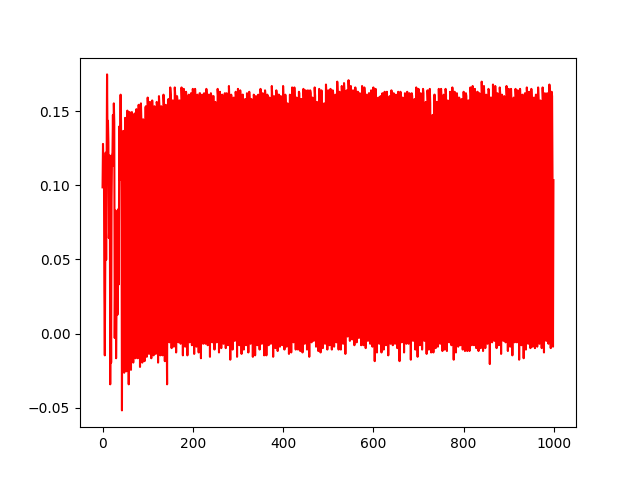

In [24]:
%matplotlib ipympl
import matplotlib.pylab as plt
    
msg = bytearray([0x72, 0x6c, 0x64, 0x21])

#msg = bytearray([0, 0x6c, 0x66, 0x7b])

trace1_d0 = capture_RSA_trace(scope, target, msg)
plt.figure()
plt.plot(trace1_d0, 'r')

2620026021614164640209147084413832394114990716131493608046687556175006331427418653749553174979466062301616129751662518979446912011472593631641073260722334 b'2\x06k\xa1\x17\x15G\x98\xac\xbe%\xbe01U\xdc\x19W\xc1\xdbk\xf6e\xf8\x9aB\x82V\xc4\x95+z\xd7\x82\xed\xd8\xdfq\x15\x87F\xefG\x05\xa3H\xf8\x1e\xe57q\xbc&"\xb70\xb7\\\xf7\x18\xc5\xe4x\x9e' <class 'bytes'>

data:32066ba117154798acbe25be303155dc1957c1db6bf665f89a428256c4952b7ad782edd8df71158746ef4705a348f81ee53771bc2622b730b75cf718c5e4789e
DBG: expmod m1 ...
expmod(32066ba117154798acbe25be303155dc1957c1db6bf665f89a428256c4952b7ad782edd8df71158746ef4705a348f81ee53771bc2622b730b75cf718c5e4789e,5d5b36298692ebe5ec05b61e1a86eced0fad09507ed807a958b915a6e3075e0b,7dabc5272ef4226f8c8c0771dc78492ca15b434c6608e0ef9ca6ee86cb6f2673) = 


(ChipWhisperer Target ERROR|File SimpleSerial.py:354) Ack error: f45a


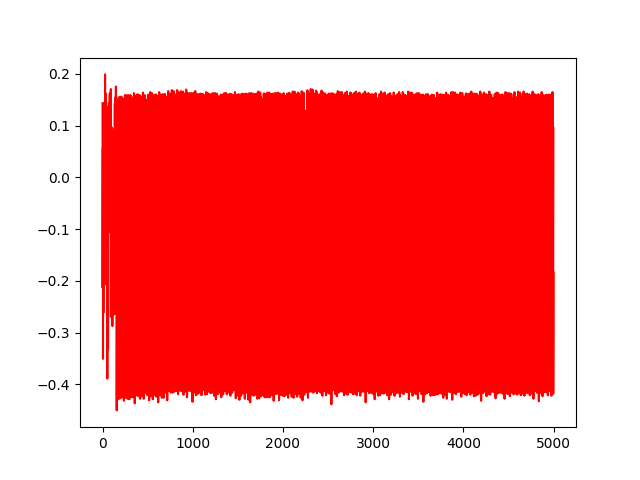

In [34]:
%matplotlib ipympl
import matplotlib.pylab as plt

msg = 62554
c = (msg ** e) % n

msg1_d1 = c.to_bytes(64,'big')

print(c, msg1_d1, type(msg1_d1))

trace1_d1 = capture_RSA_trace(scope, target, msg1_d1)
plt.figure()
plt.plot(trace1_d1, 'r')

In [ ]:
%matplotlib ipympl
import matplotlib.pylab as plt

msg = 62558
c = (msg ** e) % n

msg2_d1 = c.to_bytes(64,'big')

print(c, msg2_d1, type(msg2_d1))

trace2_d1 = capture_RSA_trace(scope, target, msg2_d1)
plt.figure()
plt.plot(trace2_d1, 'r')

In [ ]:
%matplotlib ipympl
import matplotlib.pylab as plt


trace = capture_RSA_trace(scope, target, msg)

plt.figure()
plt.plot(trace, 'b')

In [ ]:


ref_trace_msg = 683081 #diff(m) = 0
ref_trace_msg_ = 131449 #diff(m) = 1

c = (ref_trace_msg ** e) % n #2546438040
c_ = (ref_trace_msg_ ** e) % n 




msg_d0 = c.to_bytes(4,'big')
msg_d1 = c_.to_bytes(4,'big')


print(c, msg_d0, type(msg_d0))

print(c_, msg_d1, type(msg_d1))




In [ ]:
%matplotlib ipympl
import matplotlib.pylab as plt


trace_d0 = capture_RSA_trace(scope, target, msg_d0)

plt.figure()
plt.plot(trace_d0, 'b')

trace_d1 = capture_RSA_trace(scope, target, msg_d1)
plt.plot(trace_d1, 'r')


diff = np.sum(np.abs(trace_d0 - trace_d1))
print(diff)

In [ ]:
print('similar d0')

diff = np.sum(np.abs(trace_d0 - trace1_d0))
print(diff)

print('diff: d0 vs d1')

diff = np.sum(np.abs(trace_d0 - trace_d1))
print(diff)

diff = np.sum(np.abs(trace1_d0 - trace_d1))
print(diff)

diff = np.sum(np.abs(trace_d0 - trace1_d1))
print(diff)

diff = np.sum(np.abs(trace1_d0 - trace1_d1))
print(diff)

print("d1")
diff = np.sum(np.abs(trace1_d1 - trace_d1))
print(diff)

diff = np.sum(np.abs(trace1_d1 - trace_d1))
print(diff)

diff = np.sum(np.abs(trace1_d1 - trace2_d1))
print(diff)

diff = np.sum(np.abs(trace2_d1 - trace_d1))
print(diff)


In [ ]:
plt.close('all')

In [ ]:
matplotlib.pyplot.close()

%matplotlib ipympl
plt.figure()
plt.plot(trace_d1, 'r')
plt.plot(trace1_d1, 'o')
plt.plot(trace_d0, 'g')
plt.plot(trace1_d0, 'b')


### Key Reconstuction

* find plaintexts x_1 and x_2 mit diff(x_1) = 0 und diff(x_2) = 1.
* mittels binäre suche: finde x mit diff(x-1) = 0 und diff(x) = 1 -> x ist Vielfaches von p 
* ggt(x, n) = p
* x^e mod n

### Algorithmus: 
Reconstruct p
input: modulus n, public exponent e
output: prime p mit p teilt n 

1) wiederhole bis diff(x) = 1
    a) währel random Zahl x, mit 0 <= x < n
    b) c = x^e mod n
    c) Berechne diff(x) durch analyse der Plwer trace während c berechtnet
2) m= x/2, l=0
3) while m != l
    a) c = m^e mod n
    b) berechne diff(m) während c entschlüsselt wird
    c) wenn diff(m) =1: x=0, sonst l=0
    d) m = (l+x)/2
4) cerechne p = gcd(n,x)
5) return p


diff(x) = 1        x mod p - x mod q < 0
          0        sonst, p>q 

-> nur relevant, ob t = t+p performed wird 

nur wenn plaintext wählbar ist 

ref_trace_msg = 131449
enc = (ref_trace_msg ** e) % n
msg = enc.to_bytes(4,'big')
ref_trace = capture_RSA_trace(scope, target, msg)
#print(ref_trace, type(ref_trace))

plot = cw.plot({})

for c in range(62500,62600):
    enc = (c ** e) % n
    msg = enc.to_bytes(4,'big')
    trace = capture_RSA_trace(scope, target, msg)
    #print(ref_trace, type(ref_trace))
    plot *= cw.plot(trace - ref_trace)
plot 

import numpy as np


ref_trace_msg = 131449
enc = (ref_trace_msg ** e) % n
msg = enc.to_bytes(4,'big')
ref_trace = capture_RSA_trace(scope, target, msg)

for c in range(62500,62600):
    enc = (c ** e) % n
    msg = enc.to_bytes(4,'big')
    trace = capture_RSA_trace(scope, target, msg)

    diff = np.sum(np.abs(trace - ref_trace))
    print("{:1} diff = {:2}".format(c, diff))

ref_trace_msg = 2
enc = (ref_trace_msg ** e) % n
msg = enc.to_bytes(4,'big')
ref_trace = capture_RSA_trace(scope, target, msg)

threshold = 25

for c in range(62500,62600):
    enc = (c ** e) % n
    msg = enc.to_bytes(4,'big')
    trace = capture_RSA_trace(scope, target, msg)

    diff = np.sum(no.abs(trace - ref_trace))
    if diff > threshold:
        print c
        break

zu 2

geg:plaintexts x1 and x2, such that diff (x1) = 0 and diff (x2) = 1.


geg: diff(x) = 1
binäre suche: diff(x-1) = 0 und diff(x) = 1

m =x/2
l =0

In [ ]:
import math

print(math.gcd(3,6))

### Alternative 

Reconstruction of p when its bitlength is half bitlength of n
INPUT: modulus n with the bitlength t, public exponent e.
OUTPUT: prime p such that p divides n.

t = bitlenght von n
p,q haben bitlänge t/2

In [ ]:
t = 32


x = 2**16
m = 16
l = 0

plt.figure()

ref_trace_msg_ = 131449 # loop wird ausgeführt, diff(m) = 1
c_ = (ref_trace_msg_ ** e) % n 
msg_ = c_.to_bytes(4,'big')
trace_ = capture_RSA_trace(scope, target, msg_)


while m != l:
    #enc = (m ** e) % n
    
    print(m, type(m), '\n', e , type(e), '\n', n, type(n))
    enc = pow(m, e, n)
    msg = enc.to_bytes(4,'big')
    
    trace = capture_RSA_trace(scope, target, msg)
    plt.plot(trace)

    diff = np.sum(np.abs(trace - trace_))
    print("{:1} diff = {:2}".format(m, diff))
    
    #check if diff(m) = 1
    #if (m % 62549) - (m % 61543) < 0:
    #sad = 5 for diff(x) = 1 und diff(y) = 0 für debug 1 -> diff < 3
    # no debug: diff < 10
    if diff < 10: 
        x = m
    else: 
        l = m
        
    m = (l + x)//2
    
    

print (x)
    